----------------------------
# Sesión 1: Regresión lineal simple con Numpy
----------------------------

## Importaciones

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Datos

Estos datos de muestra corresponden a las propinas recolectadas por un mesero en un restaurante.

**¿Existe una relación entre el 'total_bill'y el tamaño de la mesa?**

In [2]:
!dir tips.csv

tips.csv


In [3]:
tips = np.genfromtxt('tips.csv', delimiter=',',  skip_header=1)

In [4]:
tips

array([[16.99,  1.01,   nan,   nan,   nan,  2.  ],
       [10.34,  1.66,   nan,   nan,   nan,  3.  ],
       [21.01,  3.5 ,   nan,   nan,   nan,  3.  ],
       ...,
       [22.67,  2.  ,   nan,   nan,   nan,  2.  ],
       [17.82,  1.75,   nan,   nan,   nan,  2.  ],
       [18.78,  3.  ,   nan,   nan,   nan,  2.  ]])

In [5]:
tips.shape

(244, 6)

In [6]:
tips.sort(axis=0)

In [7]:
tips

array([[ 3.07,  1.  ,   nan,   nan,   nan,  1.  ],
       [ 5.75,  1.  ,   nan,   nan,   nan,  1.  ],
       [ 7.25,  1.  ,   nan,   nan,   nan,  1.  ],
       ...,
       [48.27,  7.58,   nan,   nan,   nan,  6.  ],
       [48.33,  9.  ,   nan,   nan,   nan,  6.  ],
       [50.81, 10.  ,   nan,   nan,   nan,  6.  ]])

In [8]:
# describir cual columna corresponde al X, cual columna corresponde al Y

In [9]:
# tamaño va a ser la X
tamano = tips[:, -1]
tamano

array([1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [10]:
# estamos escogiendo que 'total_bill' , la factura
total_bill = tips[:, 0]
total_bill

array([ 3.07,  5.75,  7.25,  7.25,  7.51,  7.56,  7.74,  8.35,  8.51,
        8.52,  8.58,  8.77,  9.55,  9.6 ,  9.68,  9.78,  9.94, 10.07,
       10.07, 10.09, 10.27, 10.29, 10.33, 10.33, 10.34, 10.34, 10.51,
       10.59, 10.63, 10.65, 10.77, 11.02, 11.17, 11.24, 11.35, 11.38,
       11.59, 11.61, 11.69, 11.87, 12.02, 12.03, 12.16, 12.26, 12.43,
       12.46, 12.48, 12.54, 12.6 , 12.66, 12.69, 12.74, 12.76, 12.9 ,
       13.  , 13.  , 13.03, 13.13, 13.16, 13.27, 13.28, 13.37, 13.39,
       13.42, 13.42, 13.42, 13.51, 13.81, 13.81, 13.94, 14.  , 14.07,
       14.15, 14.26, 14.31, 14.48, 14.52, 14.73, 14.78, 14.83, 15.01,
       15.04, 15.06, 15.36, 15.38, 15.42, 15.48, 15.53, 15.69, 15.69,
       15.77, 15.81, 15.95, 15.98, 15.98, 16.  , 16.04, 16.21, 16.27,
       16.29, 16.31, 16.32, 16.4 , 16.43, 16.45, 16.47, 16.49, 16.58,
       16.66, 16.82, 16.93, 16.97, 16.99, 17.07, 17.26, 17.29, 17.31,
       17.46, 17.47, 17.51, 17.59, 17.78, 17.81, 17.82, 17.89, 17.92,
       17.92, 18.04,

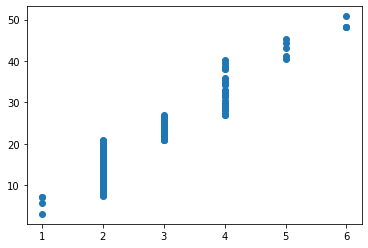

In [11]:
plt.scatter(tamano,total_bill)

In [12]:
x = tamano
y = total_bill

N = len(x)

In [13]:
N

244

In [14]:
m = (N * sum(x*y) - (sum(x))*(sum(y))) / (N * sum(x**2) - sum(x)**2 )
m

8.711821198844044

In [15]:
b = (sum(y) * sum(x**2) - sum(x)*sum(x*y))/(N * sum(x**2) - sum(x)**2 )
b

-2.600581523259056

In [16]:
m * np.arange(10) + b

array([-2.60058152,  6.11123968, 14.82306087, 23.53488207, 32.24670327,
       40.95852447, 49.67034567, 58.38216687, 67.09398807, 75.80580927])

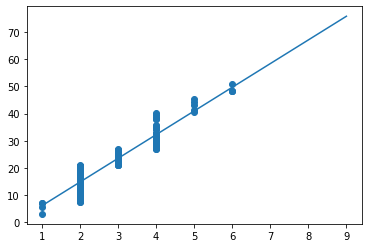

In [17]:
plt.scatter(tamano,total_bill)
plt.plot(np.arange(1, 10),m * np.arange(1, 10) + b)